# Приоритизация гипотез и оценка результатов А/В-теста интернет-магазина

Описание:
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Описание данных


* Файл hypothesis.csv
Hypothesis — краткое описание гипотезы;
Reach — охват пользователей по 10-балльной шкале;
Impact — влияние на пользователей по 10-балльной шкале;
Confidence — уверенность в гипотезе по 10-балльной шкале;
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

* Файл orders.csv
transactionId — идентификатор заказа;
visitorId — идентификатор пользователя, совершившего заказ;
date — дата, когда был совершён заказ;
revenue — выручка заказа;
group — группа A/B-теста, в которую попал заказ.
Файл /datasets/visitors.csv. Скачать датасет
date — дата;
group — группа A/B-теста;
visitors — количество пользователей в указанную дату в указанной группе A/B-теста

План проекта: 
1. Приоритизация гипотез 
2. Запуск A/B-теста 
3. Анализ результатов.




## Приоритизация гипотез

Для определение приоритетов гипотез откроем таблицу со списком гипотез и оценками по параметрам, а затем произведем расчеты метрик ICE и RICE.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import seaborn as sns
import math
import scipy.stats as stats
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

Откроем таблицу hypothesis и посмотрим, какие гипотезы в ней содержатся, по каким параметрам выставлены оценки.

In [2]:
hypothesis = pd.read_csv('C:/Users/Anna/Desktop/Обучение/Аналитика Яндекс Практикум/Датасеты/hypothesis.csv')
pd.options.display.max_colwidth = 120
hypothesis



,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [3]:
hypothesis['ICE'] = ((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']).round(2)
hypothesis1 = hypothesis[['Hypothesis', 'ICE']]
hypothesis1 = hypothesis1.sort_values(by='ICE', ascending=False)
pd.options.display.max_colwidth = 120
hypothesis1

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Применим фреймворк RICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [4]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis2 = hypothesis[['Hypothesis', 'RICE']]
hypothesis2 = hypothesis2.sort_values(by='RICE', ascending=False)
hypothesis2

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Вывод 
При использовании разных методов (ICE и RICE) мы получили разные результаты по приоретизации гипотез. Это связано с тем, что в методе RICE используется параметр Reach, а у гипотез 7, 2 и 3 стоят высокие оценки по этому параметру. При этом у гипотезы 3 достаточно низкие оценки по параметрам 'влияние на пользователей' и 'уверенность в гипотезе', а проверка этой гипотезы  стоит больших усилий/затрат. 
Поэтому наиболее приоритетными гипотезами можно считать 7-ю и 2-ю.

## Анализ A/B-теста
### Предобработка таблиц orders и visitors

Откроем таблицу orders

In [5]:
orders = pd.read_csv('C:/Users/Anna/Desktop/Обучение/Аналитика Яндекс Практикум/Датасеты/orders.csv')
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
#для удобства приведем названия столбцов к "змеиному" регистру.
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group'] 
orders.head(5)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
#посмотрим на общую информацию о таблице, на типы данных.
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
#посмотрим, можем ли мы что-то увидеть из описания данных в таблице
orders.describe()

,transaction_id,visitor_id,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [9]:
#приведём столбец date к типу datetime
orders['date'] = pd.to_datetime(orders['date'])

In [10]:
#проверим таблицу на наличие дубликатов
orders.duplicated().sum()

0

In [11]:
#посмотрим на среднее, максимальное и минимальное значение в столбце с выручкой.
print(orders['revenue'].mean())
print(orders['revenue'].median())
print(orders['revenue'].min())
print(orders['revenue'].max())

8348.005847953216
2978.0
50
1294500


Судя по тому, что среднее и медиана слишком сильно отклоняются от максимального значения, в столбце есть выбросы.

In [12]:
#проверим, что тип данных в столбце с датой изменился
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Теперь откроем таблицу visitors.

In [13]:
visitors = pd.read_csv('C:/Users/Anna/Desktop/Обучение/Аналитика Яндекс Практикум/Датасеты/visitors.csv')
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
#приведём столбец date к типу datetime
visitors['date'] = pd.to_datetime(visitors['date'])

In [15]:
#проверим таблицу на наличие дубликатов
visitors.duplicated().sum()

0

In [16]:
#посмотрим, сколько пользователей в день посещает страницу.
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Видим, что в день приходит от 361 до 770 пользователей, причем и медиана, и среднее больше стремятся к верхнему значению.

In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверим, совпадают ли даты в таблицах orders и visitors.
В таблице 

In [18]:
print(orders['date'].nunique())
print(orders['date'].min())
print(orders['date'].max())

31
2019-08-01 00:00:00
2019-08-31 00:00:00


In [19]:
print(visitors['date'].nunique())
print(visitors['date'].min())
print(visitors['date'].max())

31
2019-08-01 00:00:00
2019-08-31 00:00:00


Посмотрим, как распределились пользователи по группам А и В.

In [20]:
a_users = visitors[visitors['group']=='A']['visitors'].sum()
b_users = visitors[visitors['group']=='B']['visitors'].sum()
print('Пользователи A:',a_users)
print('Пользователи В:', b_users)

Пользователи A: 18736
Пользователи В: 18916


In [21]:
a_users = orders[orders['group']=='A']['visitor_id'].nunique()
b_users = orders[orders['group']=='B']['visitor_id'].nunique()
print('Пользователи A:',a_users)
print('Пользователи В:', b_users)

Пользователи A: 503
Пользователи В: 586


В группах неравное количество пользователей, но разница в пределах 1%. Такое различие не должно значительно повлиять на результат.

Теперь проверим, есть ли пользователи, которые попали сразу в обе группы.

In [22]:
ab_users = orders.groupby('visitor_id').agg({'group':'nunique'})
ab_users = ab_users.query('group > 1')
ab_users['group'].count()

58

В таблице есть 58 пользователей, которые попали сразу в обе группы. Это не совсем правильно, но лучше их не удалять, т.к. они могли принести больше количество заказов или выручки.

### Вывод
В обеих таблицах представлены данные за август 2019 года. Значит, можно объединять таблицы по датам.
В таблицах не выявлены дубликаты и пустые значения. Можно приступать к анализу.

## Построение графика кумулятивной выручки по группам. 

Создадим таблицу куммулятивных данных по двум таблицам.

In [23]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transaction_id' : pd.Series.nunique,
'visitor_id' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 


visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))


        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Построим графики кумулятивной выручки по дням по группам.

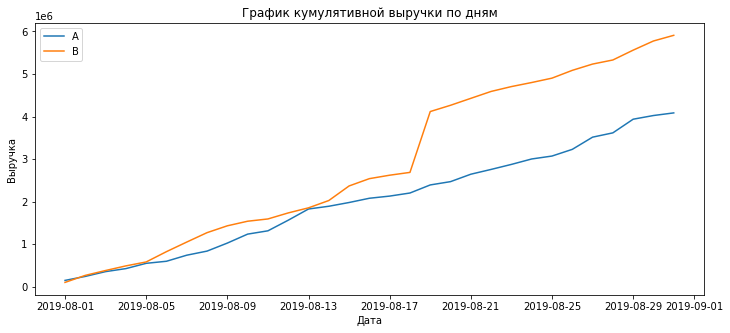

In [24]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по дням') 
plt.legend() 
plt.show()

### Вывод
В начале месяца выручка в группе В росла быстрее, 13 августа выручка в группах А и В сравнялась, а дальше группа В стала явно лидировать. Но на графике заметен явный скачок в районе 18-19 августа. Мы помним, что у нас были заказы с экстремально высокой стоимостью. Возможно, они повлияли на график.

## Построение графика кумулятивного среднего чека по группам. 

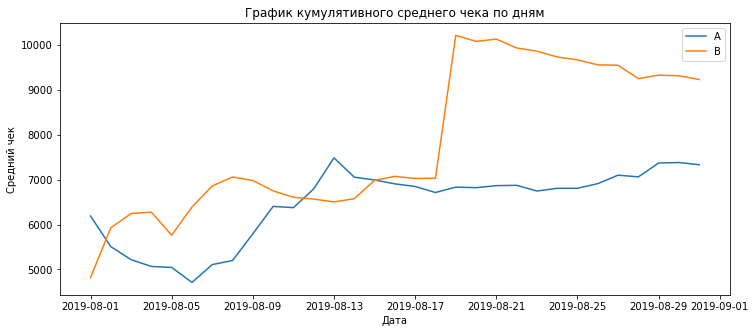

In [25]:
plt.figure(figsize=(12,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по дням') 
plt.legend() 
plt.show()

### Вывод
График кумулятивного среднего чека похож на предыдущий, тоже видно всплеск 18-19 августа.

## Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

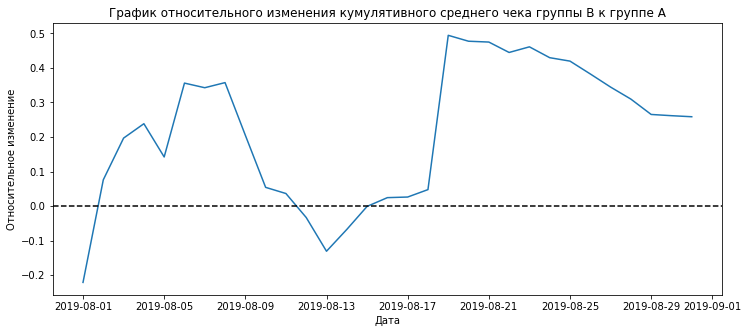

In [26]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A') 
plt.show()

### Вывод
Здесь мы видим относительные различия кумулятивного среднего чека группы B к группе A. Средний чек В сначала рос, в районе 7 августа начал падать, после 13 августа стал расти, и снова виден скачок 18-19 августа. Резкие взлёты и падения могут быть связаны с выбросами - экстремально дорогими или дешевыми заказами.


## Построение графика кумулятивной конверсии по группам

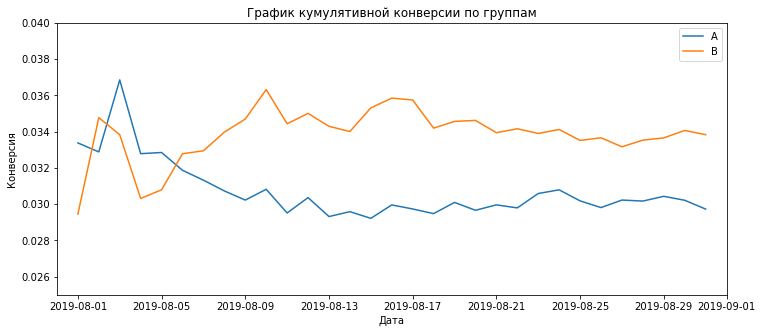

In [27]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(12,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('График кумулятивной конверсии по группам') 
# задаем масштаб осей
plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), 0.025, 0.04])
plt.show()

### Вывод
В начале месяца конверсия группы A была выше, но после пика в районе 3 августа она стала падать. Примерно после 10 августа конвервия группы В оставалась на одном уровне. Конверсия группы B была ниже А в начале месяца, но окло 6 августа превысила её, росла до 10 августа, далее также стабилизировалась. В целом за исследуемый период конверсия группы В была выше.

## Построение графика относительного изменения кумулятивной конверсии группы B к группе A

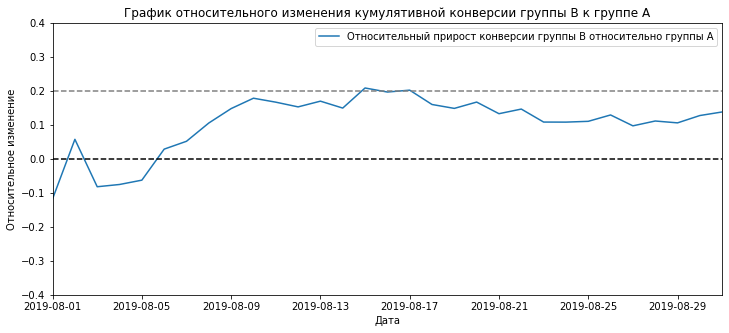

In [28]:
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.4, 0.4])
plt.show()

### Вывод
В начале месяца конверсия группы В была ниже, чем А (кроме одного дня), после 6 августа стабильно была выше конверсии группы А максимум на 20%, в среднем на 10-15%.

## Распределение заказов по пользователям

Создадим таблицу, в которой сгруппируем пользователей по количеству сделанных ими заказов. Затем построим график распределения.

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


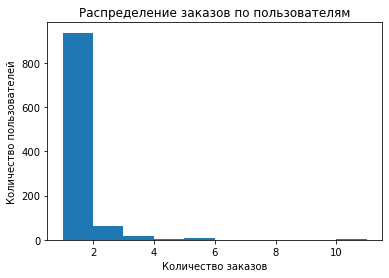

In [29]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
plt.hist(ordersByUsers['orders']) 
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.title('Распределение заказов по пользователям')
plt.show()

Мы видим, что большинство пользователей совершило по одному заказу. Более четырех заказов - совсем мало пользователей, но построим точечный график, чтобы рассмотреть выбросы лучше.

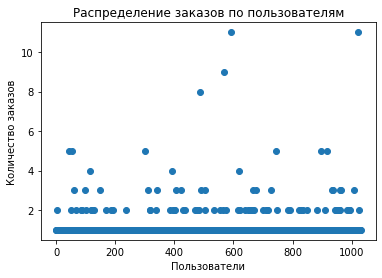

In [30]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.title('Распределение заказов по пользователям')
plt.show()

Видим, что больше двух заказов размещают мало пользователей. Более пяти - совсем единичные случаи.

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [31]:
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5
[1. 2. 4.]


### Вывод
Получается, что не более 5% пользователей совершали больше 2 заказов, а более 4-х - не больше 1%.
Будем считать аномальными тех пользователей, котрые совершили 4 и более заказов.

## Распределение пользователей по стоимости заказов

Построим точечный график стоимостей заказов.

      transaction_id  visitor_id       date  revenue group
425        590470918  1920142716 2019-08-19  1294500     B
1196      3936777065  2108080724 2019-08-15   202740     B
858        192721366  1316129916 2019-08-27    93940     A
1136       666610489  1307669133 2019-08-13    92550     A
744       3668308183   888512513 2019-08-27    86620     B
682       1216533772  4266935830 2019-08-29    78990     B
662       1811671147  4266935830 2019-08-29    78990     A
743       3603576309  4133034833 2019-08-09    67990     A
1103      1348774318  1164614297 2019-08-12    66350     A
1099       316924019   148427295 2019-08-12    65710     A


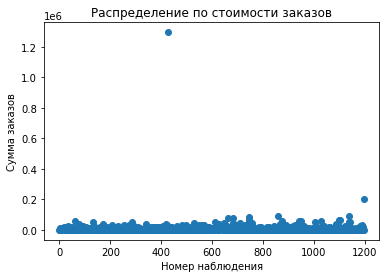

In [32]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.ylabel('Сумма заказов')
plt.xlabel('Номер наблюдения')
plt.title('Распределение по стоимости заказов')
plt.show()

По графику видно, что у нас всего 2  выбивающихся заказа по стоимости, остальные заказы - менее 200 000.

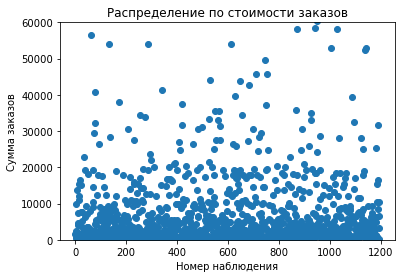

In [33]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']) 
plt.ylabel('Сумма заказов')
plt.xlabel('Номер наблюдения')
plt.title('Распределение по стоимости заказов')
plt.ylim(0, 60000)
plt.show()

Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [34]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


### Вывод
Заказы дороже 28 000 оформляют не более 5% пользователей, а больше 58 233 - не более 1%. Будем считать аномальными заказы дороже 58233.2.

## Определение статистической значимости различий в конверсии между группами по «сырым» данным

Начнём с подготовки данных.
Объединим в одну таблицу все необходимые нам данные.

In [35]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)

ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Посчитаем количество совершенных заказов.

In [36]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Создадим переменные sampleA и sampleB по количеству заказов в каждой группе. 
Посчитаем p-value и относительный прирост.
Гипотезы:
Н0 - Конверсии между группами равны
Н1 - Конверсии между группами различаются

In [37]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
print("p-value: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный прирост группы B к группе A: {0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

p-value: 0.01679
Относительный прирост группы B к группе A: 0.138


### Вывод
Первое число — p-value = 0.01679 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Однако относительный прирост коныерсии группы B равен 13.8%.

## Определение статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.
Н0 - Средний чек между группами равен
Н1 - Средний чек между группами различается

In [38]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост группы B к группе A: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.729
Относительный прирост группы B к группе A: 0.259


### Вывод
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A, почти на 26%.

## Определение статистической значимости различий в конверсии между группами по «очищенным» данным. 

Сначала выявим аномальных пользователей. Уберем 1% (согласно 99 перцентилю): это пользователи, которые совершили более 4 заказов и сумма заказа превышала 58233.2.

In [39]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64


Посчитаем статистическую значимость различия конверсии после удаления аномальных пользователей.
Н0 - Средний чек между группами равен 
Н1 - Средний чек между группами различается

In [40]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('p-value: {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост группы B к группе A: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.01438
Относительный прирост группы B к группе A: 0.153


### Вывод
Как и в случае с сырыми данными p-value меньше 0.05, статистическая значимость достигнута. Сегмент В значительно лучше сегмента А. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем


## Определение статистической значимости различия средних чеков после удаления аномальных пользователей.

Н0 - Средний чек между группами равен
Н1 - Средний чек между группами различается

In [41]:
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост Group_B к Group_A: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value: 0.851
Относительный прирост Group_B к Group_A: -0.006


### Вывод
После очистки данных от аномалий p-value по среднему чеку не изменился - статистически значимых отличий между группами нет. Причин отвергать нулевую гипотезу нет. Относительное различие группы В относительно группы А после очистки данных упало, но составляет меньше 1%. 

## Общий вывод

В ходе первой части проекта были проведены расчеты по определению приоритета нескольких содержащихся в таблице гипотез, самой приоритетной выбрана гипотеза №7.

Вторая часть проекта позволила нам проанализировать результаты А/В теста.
- В ходе исследования было обнаружено, что существует статистически значимое различие по конверсии между группами как по сырым данным, так и после очистки от аномальных значений, а вот по среднему чеку статистически значимых различий нет.
- Судя по графикам, группа В показала лучшие результаты по сравнению с группой А. Конверсия лучше при одинаковом среднем чеке, а также видна тенденция к росту. 
- После проведения исследования можно предложить остановить тест и считать его успешным. Группу В можно считать успешнее, чем группу А.